# Proyecto mineria de datos

coordinates plot libraries

In [1]:
import json
from pprint import pprint

import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

from mpl_toolkits.basemap import Basemap
from scipy.misc import imread


Text mining libraries

In [2]:
import codecs
import glob
import json
import matplotlib.pyplot as plt
import nltk
import numpy as np
import os
import pandas as pd
import re
import string
import time

#nltk.download()
%matplotlib inline
from ggplot import *
from math import log
from matplotlib import pyplot as plt
from nltk import sent_tokenize, word_tokenize
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from scipy import ndimage
from sklearn import manifold, datasets
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from time import time

## Load

In [3]:
with open('test2.json') as data_file:    
    data = json.load(data_file, encoding="latin-1")

### Data structure

In [4]:
print "páginas de registros:", len(data)
print "claves por página:", data[0].keys()
print "claves de \"photos\":" ,data[0]["photos"].keys()
print "fotos por página", len(data[0]["photos"]["photo"])
print "claves por \"photo\"",pd.DataFrame( data[0]["photos"]["photo"][0].keys() )

páginas de registros: 500
claves por página: [u'photos', u'stat']
claves de "photos": [u'photo', u'total', u'pages', u'page', u'perpage']
fotos por página 250
claves por "photo"                        0
0              pathalias
1          geo_is_public
2               place_id
3           media_status
4                  owner
5                     id
6   datetakengranularity
7                  woeid
8          geo_is_friend
9         geo_is_contact
10             datetaken
11              isfriend
12                secret
13             ownername
14              latitude
15              accuracy
16              isfamily
17                 media
18           description
19                  tags
20                  farm
21         geo_is_family
22      datetakenunknown
23              ispublic
24                 url_s
25             longitude
26                server
27               context
28              height_s
29                 title
30               width_s


# Preprocessing

## Plot coordinates of the pictures

In [5]:
Lat=[]
Long=[]
Tags=[]
Ids=[]
Urls=[]
for datas in data:
    Lat_datas=[float(pic["latitude"]) for pic in datas["photos"]["photo"]]
    Long_datas=[float(pic["longitude"]) for pic in datas["photos"]["photo"]]
    Tags_datas=[pic["tags"] for pic in datas["photos"]["photo"]]
    Ids_datas=[pic["id"] for pic in datas["photos"]["photo"]]
    Urls_datas=[pic["url_s"] for pic in datas["photos"]["photo"]]
    
    Lat.extend(Lat_datas)
    Long.extend(Long_datas)
    Tags.extend(Tags_datas)
    Ids.extend(Ids_datas)
    Urls.extend(Urls_datas)

### Plot pictures coordintaes in a map

https://stevendkay.wordpress.com/tag/basemap/

https://www.getdatajoy.com/examples/python-plots/plot-data-points-on-a-map


#### Basemap documentation
https://basemaptutorial.readthedocs.io/en/latest/

http://matplotlib.org/basemap/users/index.html

http://matplotlib.org/basemap/users/examples.html


#### load picture method
http://stackoverflow.com/questions/15160123/adding-a-background-image-to-a-plot-with-known-corner-coordinates

https://www.openstreetmap.org/

### Bogotá coordinates

East long=-73.98

West long=-74.23

North lat=4.84

South lat=4.46

In [6]:
North=4.84
South=4.46
East=-73.98
West=-74.23

def map_dim(wide):
    high_m=abs(North-South)
    wide_m=abs(East-West)
    ratio=high_m/wide_m
    return([float(wide),float(wide)*ratio])

In [7]:
map_dim(15)

[15.0, 22.799999999999994]

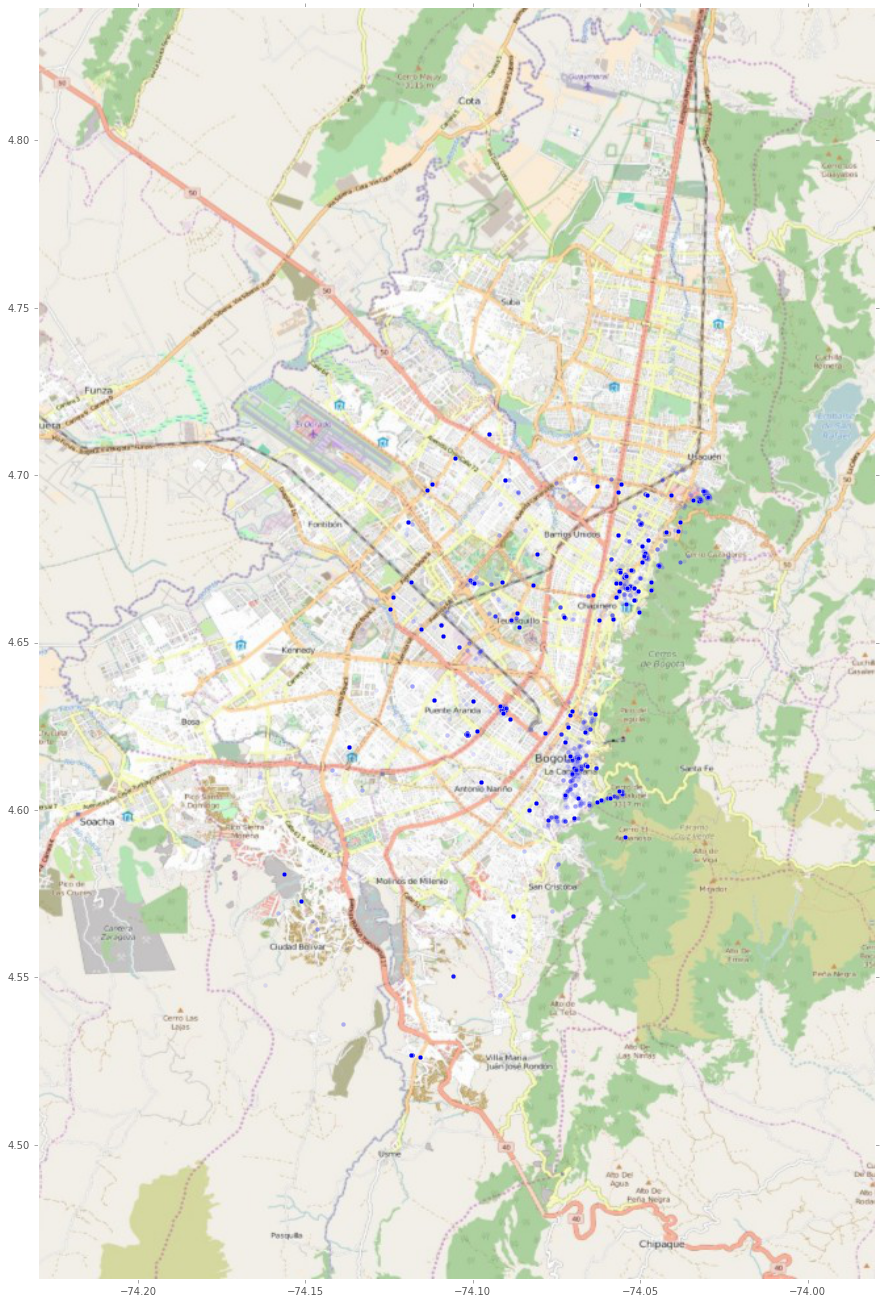

In [8]:
img = imread("map2.jpg")
plt.figure(figsize=(map_dim(15)[0],map_dim(15)[1]))
plt.imshow(img,zorder=1, extent=[-74.23, -73.98,4.46,  4.84])
plt.scatter(Long, Lat, alpha=0.1,zorder=2)
plt.ylim(4.46,4.84)
plt.xlim(-74.23, -73.98)
plt.savefig('mapa_puntos.jpg')
plt.show()


## Tags processing

In [9]:
print len(list(set(Ids)))
print len(list(set(Tags)))
print len(list(set(Urls)))

4000
606
4000


In [10]:
list(set(Tags))

[u'',
 u'cosplay bogot\xe1 eleanor loire corferias cosplaycolombia sofa2015 sal\xf3ndelocioydelafantas\xeda bogot\xe1cosplay sofasal\xf3ndelocioydelafantas\xeda',
 u'museum painting colombia bogota arte nationalmuseum 2016 colombianart museonacional enriquegrau enriquegrauaraujo colmbianart',
 u'latinamerica southamerica colombia bogota bogot\xe1 cundinamarca cerrodemonserrate bogot\xe1dc cerrosorientales cordilleraoriental cerrosorientalesdebogot\xe1',
 u'bogot\xe1',
 u'man museum colombia colombian bogot\xe1 handsome guapo museonacional',
 u'chicken restaurant colombia bogot\xe1 pollo avenidaeldorado centrocomercialgranestaci\xf3n samsunggalaxycoreprime',
 u'bogota columbia letterpress forme moveabletype printingmuseum museumofgraphicarts imprentanacional2',
 u'bogota columbia printingpress printingmuseum letterpressprinting hach\xe9e museumofgraphicarts imprentanacional2',
 u'flowers sky lake flores fall fountain night garden botanical lago mirror noche reflex colombia bogota aftern